<a href="https://colab.research.google.com/github/azadranjith/imagenette/blob/main/imagenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastai.vision.all import *


In [ ]:
path = untar_data(URLs.IMAGENETTE)

In [ ]:
#to move the downloaded to drive
#!mv /root/.fastai/data/imagenette2-160 '/content/drive/MyDrive/imagenette'

# CREATING TRAIN VALID DATASET 

data block api

1. what kind of data you have
2. how to get list of items
3. how to label the item
4. how to create validation set

In [ ]:
#creating a function to get parent folder name
def parent_folder(path):
  try:
    pattern = '\/([\dA-Za-z -]*)\/[A-Z_a-z\d]+.JPEG'
    match = re.findall(pattern,str(path))
    for i in match:
      if i !='':
        cat = i
    return cat
  except:
    print('check these files')
    print(path)

In [ ]:
for i in (path/'val'/'n03417042').iterdir():
  print(i)
  break

/root/.fastai/data/imagenette2/val/n03417042/n03417042_5362.JPEG


In [ ]:
x = parent_folder('/root/.fastai/data/imagenette2/val/n03417042/n03417042_5362.JPEG')
x

['n03417042']


'n03417042'

In [ ]:
#creating dataset from datablock api

dset = DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_items = get_image_files,
                 splitter = GrandparentSplitter(valid_name='val'),
                 get_y=parent_folder)

In [ ]:
#dataset
dataset = dset.datasets(path)

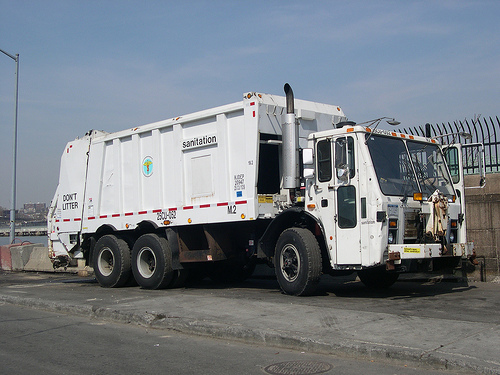

In [ ]:
x,y=dataset.train[10]
x

In [ ]:
a,b = dataset.valid[100]
a

In [ ]:
dataset.vocab

['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']

# CREATING DATALOADERS FROM DATABLOCK API

In [ ]:
imagenette = DataBlock(blocks = (
    ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_folder,
    splitter=GrandparentSplitter(valid_name='val'),
    item_tfms=Resize(400))

In [ ]:
dls = imagenette.dataloaders(path)

In [ ]:
dls.train.show_batch(max_n=9)

In [ ]:
learn = vision_learner(dls,resnet18,metrics = error_rate)
learn.fine_tune(10)

In [ ]:
x=learn.predict(x)

In [ ]:
x

In [ ]:
#without using pretrained
learner = vision_learner(dls,resnet18,metrics=error_rate)
learner.fit(5)